In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazer previsões de classe e de probabilidade
y_pred = knn.predict(X_test) # A classe prevista diretamente para cada amostra.
y_pred_proba = knn.predict_proba(X_test) #As probabilidades associadas a cada classe para cada amostra.
#A curva ROC não funciona com as classes finais previstas (y_pred), porque ela precisa avaliar o desempenho do classificador em vários limiares de decisão.
#y_pred: já traz a decisão final (ex.: 0 ou 1).
#y_pred_proba: traz as probabilidades da classe positiva (ex.: risco de ser da classe 1).

AUC-ROC Score: 1.0000
Acurácia: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


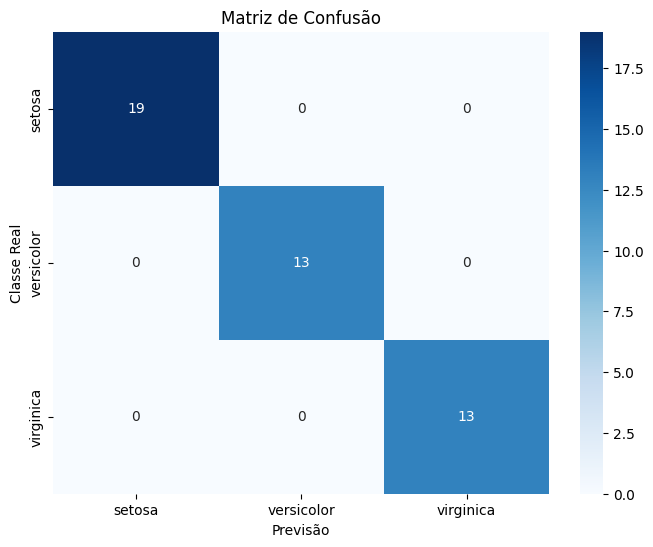

In [3]:
# AUC-ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
auc_roc = roc_auc_score(y_test_binarized, y_pred_proba)

#A função roc_auc_score calcula a área sob a curva ROC, que depende das taxas de verdadeiros positivos e falsos positivos em diferentes limiares de decisão.
#Esses limiares são baseados nas probabilidades de classificação, e não nas classes classificadas diretamente.


# Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir resultados
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Exibir a matriz de confusão com heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Classe Real')
plt.show()

Diferença entre LabelBinarizer e get_dummies:

LabelBinarizer: Focado principalmente em rótulos (saídas). Ele binariza rótulos de classificação para tornar compatível com modelos de machine learning. Útil tanto para classificação binária quanto para multiclasse.

get_dummies (do pandas): Usado para transformar features categóricas (variáveis independentes) em colunas de variáveis dummies (one-hot encoding), tornando-as numéricas para modelos de regressão e classificação.